# Lecture 11
## Gas accretion

In the past lectures, we have build a model in which the total gas mass of the galaxy changes in time as a function of an outwards and inwards flux. Today we focus on the inwards flux: its possible sources and the mechanisms behind it. 

The first consideration we can make is that $\overset{.}{m}_g^\mathrm{in}$ cannot be totally originated from the halo, otherwise the halo would be depleted after a certain timescale. Therefore, there must be some other component: we consider two, one from inside the halo ($\overset{.}{m}_\mathrm{g, inside}^\mathrm{in}$) and one from outside ($\overset{.}{m}_\mathrm{g, outside}^\mathrm{in}$).

$\frac{dM_g}{dt} = + 10^9 \,  \times \left( \left(f_b \, \cdot \xi \, \cdot \overset{.}{M}_h - \epsilon \cdot (1 + \eta - R) \cdot \frac{M_g (t)}{t_\mathrm{dyn} (t)}\right) - 2.4 \times 10 ^{-7} \cdot M_{BH}(t) \right) \,\, \frac{M_\odot}{\mathrm{yr}}$

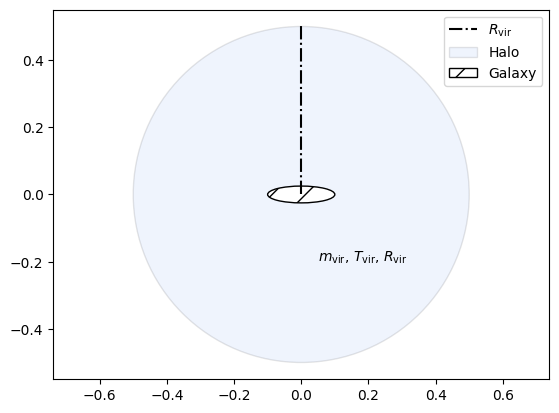

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

from matplotlib.patches import Circle, Ellipse

fig, ax = plt.subplots()
r1 = Circle((0, 0), radius = 0.5)
r0 = Ellipse((0,0), width = 0.2, height = 0.05)
r1.set(edgecolor = 'black', facecolor = 'cornflowerblue', alpha = 0.1, label = 'Halo')
r0.set(edgecolor = 'black', facecolor = 'white', hatch = '/', label = 'Galaxy')
plt.plot(np.zeros(10), np.linspace(0, 0.5, 10), '-.', color = 'black', label = '$R_\mathrm{vir}$')
plt.text(0.05, -0.2, '$m_\mathrm{vir}$, $T_\mathrm{vir}$, $R_\mathrm{vir}$')
ax.add_patch(r1)
ax.add_patch(r0)
ax.axis('equal')
plt.legend(loc = 'upper right')
plt.show()

### Outside component
To determine the form of the outside component of the flux, we need to first ask ourselves the mechanisms behind haloes' accretion of gas, or rather of their total matter, which is mostly made up by dark matter.

Assuming that:

1. the halo is composed only by dark matter,
2. spherical symmetry;

then we can consider a shell and compute the variation of mass:
$$\frac{dm_\mathrm{vir}}{dt} = 4\pi R_\mathrm{vir}^2\rho(R_\mathrm{vir}) \times v_\mathrm{fall}(R_\mathrm{vir}) $$

where we multiplied by a velocity to express the formula in terms of $[M / T]$.

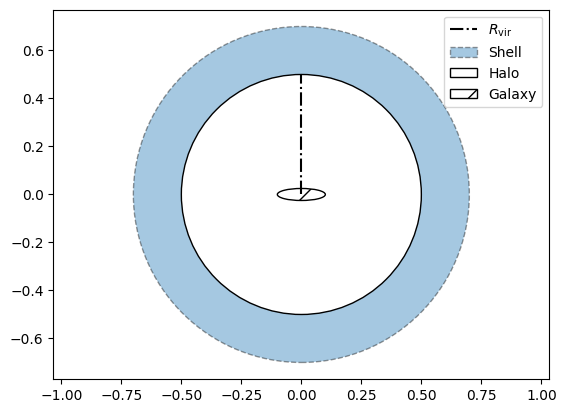

In [2]:
fig, ax = plt.subplots()
r1 = Circle((0, 0), radius = 0.5)
r2 = Circle((0,0), radius = 0.7)
r0 = Ellipse((0,0), width = 0.2, height = 0.05)
r2.set(edgecolor = 'black', fill = 'cornflowerblue', alpha = 0.4, linestyle = 'dashed', label = 'Shell')
r1.set(edgecolor = 'black', facecolor = 'white', alpha = 1, label = 'Halo')
r0.set(edgecolor = 'black', facecolor = 'white', hatch = '/', label = 'Galaxy')
plt.plot(np.zeros(10), np.linspace(0, 0.5, 10), '-.', color = 'black', label = '$R_\mathrm{vir}$')
ax.add_patch(r2)
ax.add_patch(r1)
ax.add_patch(r0)
ax.axis('equal')
plt.legend(loc = 'upper right')
plt.show()

We would now like to express this formula only in terms of $m_\mathrm{vir}$, $R_\mathrm{vir}$ and $\rho$:
$$v_\mathrm{fall} = \sqrt{\frac{G \, m_\mathrm{vir}}{R_\mathrm{vir}}} $$

$$ \frac{dm_\mathrm{vir}}{dt} \propto R_\mathrm{vir}^{3/2} \, m_\mathrm{vir} ^ {1/2}\,  \rho(R_\mathrm{vir})^{1/2} \propto m_\mathrm{vir} \, \rho(R_\mathrm{vir}) \propto m_\mathrm{vir} \cdot \rho_\mathrm{vir}^{1/2}$$

where we have assumed $\rho(R_\mathrm{vir}) \propto \rho_\mathrm{vir}$ and, for virialised structures, $\rho_\mathrm{vir} \simeq 200 \rho_0$, where $\rho_0$ is the mean density of the universe.
$$ \frac{dm_\mathrm{vir}}{dt} \propto m_\mathrm{vir} \cdot \rho_0^{1/2} \propto m_\mathrm{vir} \cdot (1 + z)^{3/2} $$
We are implicitly assuming a non-expanding, flat universe with no dark energy. We have found that **larger and older** (at higher $z$) **haloes accrete faster!** Thus, our inwards flux coming from outside the halo is:
$$\overset{.}{m}_\mathrm{g, outside}^\mathrm{in} \propto f_b \, m_\mathrm{vir} \, (1+z)^{3/2} $$

where $f_b$ is the barionic fraction. To check this experimentally, one can use the Millennium simulation (n-body simulation of the entire matter content of the universe), in particular involving only dark matter. This has been done ([McBride et al.](https://arxiv.org/abs/0902.3659)) and we have found:
$$<\overset{.}{m}_\mathrm{g, outside}^\mathrm{in}> = 42 M_\odot yr^{-1} \, \frac{m_\mathrm{vir}}{10^{12} M_\odot}^{1.127 }\times (1+1.17z)\sqrt{\Omega_m(1+z)^3 + \Omega_\lambda} $$
which is in agreement with our derivation if $\Omega_m = 1$ and $\Omega_\lambda = 0$.

# Inside component
Once we know how haloes can accrete gas, we now need to understand its evolution from the halo to the galaxy. The two limits are:

1. the gas is in **hydrostatic equilibrium**, the pressure generated from the gas (which depends on the temperature) is able to counterbalance the gravitational force. It this were true, then:
$$ \overset{.}{m}_g^\mathrm{in} = \xi \cdot \frac{dm_\mathrm{vir}}{dt} = 0$$
where $\xi$ = 0. We would be back to the closed box model.

2. the gas is not at equilibrium, it falls due to the gravitational pull of the galaxy:
$$ \overset{.}{m}_g^\mathrm{in} = \xi \cdot \frac{dm_\mathrm{vir}}{dt} = \frac{dm_\mathrm{vir}}{dt} $$
where $\xi$ = 1.

The two cases can be distinguished based on the two timescales: the time needed for the gas to cool down (if T decreases, p also decreases) and the free fall time. 
$$ t_\mathrm{cool} > t_\mathrm{fall} \implies \xi = 0 $$
$$ t_\mathrm{cool} < t_\mathrm{fall} \implies \xi = 1 $$

These times depend not only on the virial temperature, but also on the atomic density $n$, the metallicity $Z$ and the virial mass.

If we assume the collisional ionization equilibrium (meaning that the only process which can ionize atoms is collision, no photoionization present, the assumption holds if $T_\mathrm{vir} > 10^4 K$), then:
$$ t_\mathrm{cool} = \frac{3/2 \cdot n k T}{n^2 \cdot \Lambda(T)} $$

In particular, if the only cooling process is Bremsstrahlung radiation (where an electron passes close to a proton and gets slowed, emitting photons), then:

$$ t_\mathrm{cool}^\mathrm{Brem} \propto n^{-1} \cdot T^{1/2} $$

More specifically, $t_\mathrm{cool}$ holds when the virial theorem holds, thus it also depends on the mass. There is actually a mass range which discriminates the two cases:
- $M < 10^9 M_\odot \,\,\, \mathrm{ or } \,\,\, M > 10^{11 - 12} \implies \xi = 0$,
- $10^9 < M < 10^{12} M_\odot \implies \xi = 1$.

But $t_\mathrm{cool}$ also depends on the type of gas present, meaning the metallicity.

## Halo mass
Using a technique called abundance matching, a relation between the stellar mass and the halo mass has been found:
$$\frac{m_*}{m_\mathrm{vir}} = 2N \times \left[\left(\frac{M}{11 M_\odot}\right)^{-\beta} + \left(\frac{M}{11 M_\odot}\right)^{\gamma} \right] $$

where $N$, $M$, $\beta$ and $\gamma$ are defined parameters.

In [16]:
import scienceplots
plt.style.use(['science', 'no-latex'])

In [17]:
SDSS_in = Table.read('Data/SDSS_LAB2024_photometry.fits')
SDSS_ph = Table.read('Data/SDSS_LAB2024_CIGALEresults.fits') #SDSS photometry results
SDSS_sp = Table.read('Data/SDSS_LAB2024_spectroscopy.fits') #SDSS spectroscopy results

In [18]:
s_mass0 = SDSS_ph['best_stellar_m_star']
sfr0 = SDSS_ph['best_sfh_sfr']
age0 = SDSS_ph['best_sfh_age'] 
redshift0 = SDSS_in['redshift']

In [19]:
m_1 = np.power(10, 11.59 + 1.195 * (redshift0 / (redshift0 +1)))
N = 0.0351 - 0.0247 * (redshift0 / (redshift0 +1))
beta = 1.376 - 0.826 * (redshift0 / (redshift0 +1))
gamma = 0.608 + 0.329 * (redshift0 / (redshift0 +1))

In [20]:
halo_mass = np.logspace(10, 15, 92483)
m = 2 * N * np.power(np.power(halo_mass / m_1, -beta) + np.power(halo_mass / m_1, gamma), -1)

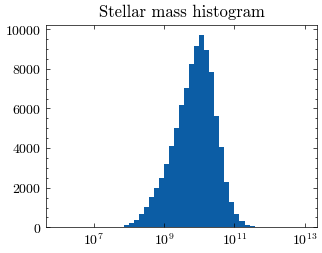

In [22]:
plt.hist(s_mass0, np.logspace(6, 13, 50))
plt.semilogx()
plt.title('Stellar mass histogram')
plt.show()

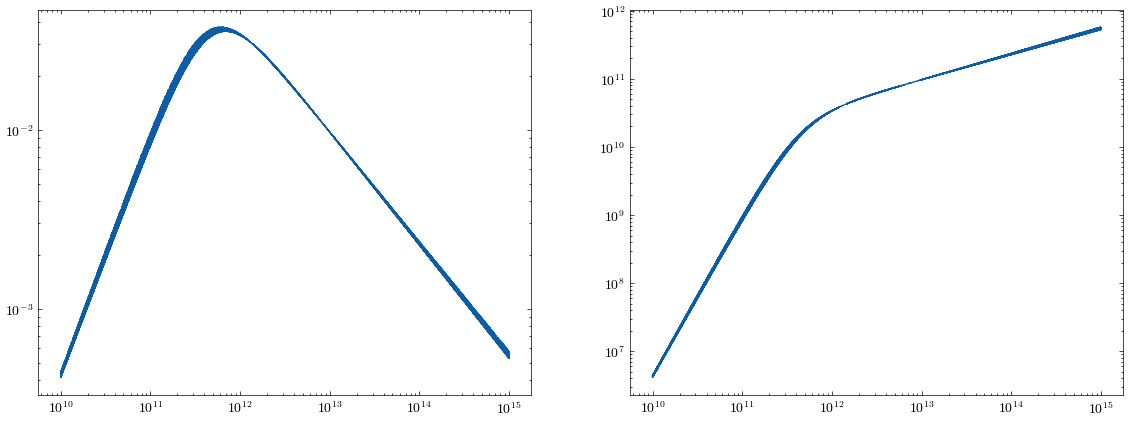

In [23]:
fig = plt.figure(figsize = (14, 5))

ax = fig.add_subplot(121)
ax.plot(halo_mass, m)
ax.loglog()

ax = fig.add_subplot(122)
ax.plot(halo_mass, m * halo_mass)
ax.loglog()
plt.show()

In [24]:
init_ph_data = np.array(SDSS_ph)
init_sp_data = np.array(SDSS_sp)

In [25]:
invalid_index = []
for i in range(len(init_sp_data)):
    for j in range(4, 19, 2):       #emission lines data go from index 4 to 19, the even indexes are the values while the odd ones are the errors
        if init_sp_data[i][j]/init_sp_data[i][j+1] <= 5:
            invalid_index.append(i)
            break

In [26]:
print(len(invalid_index))
print(len(age0))
ph_data = np.delete(init_ph_data, invalid_index)
sp_data = np.delete(init_sp_data, invalid_index)
s_mass = np.delete(s_mass0, invalid_index)
sfr = np.delete(sfr0, invalid_index)
age = np.delete(age0, invalid_index)
redshift = np.delete(redshift0, invalid_index)
print(len(age))

58453
92483
34030


In [27]:
x_data = [np.log10(sp_data[i][14]/ sp_data[i][12]) for i in range(len(sp_data))]
y_data = [np.log10(sp_data[i][10]/sp_data[i][8]) for i in range(len(sp_data))]

In [28]:
separation_line = [0.61/ (x - 0.05) + 1.3 for x in x_data]
AGN_index = []
stellar_index = []

for i in range(len(x_data)):
    if (y_data[i] >= separation_line[i]):
        AGN_index.append(i)
    else:
        stellar_index.append(i)

AGN_mass = np.delete(s_mass, stellar_index)
stellar_mass = np.delete(s_mass, AGN_index)

AGN_sfr = np.delete(sfr, stellar_index)
stellar_sfr = np.delete(sfr, AGN_index)

AGN_age = np.delete(age, stellar_index)
stellar_age = np.delete(age, AGN_index)

AGN_z = np.delete(redshift, stellar_index)
stellar_z = np.delete(redshift, AGN_index)

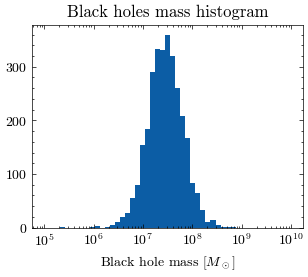

In [30]:
m_bh = AGN_mass * 0.0014
plt.hist(m_bh, np.logspace(5, 10))
plt.xlabel('Black hole mass [$M_\odot$]')
plt.title('Black holes mass histogram')
plt.semilogx()
plt.savefig('Plots/BH_mass_histo.svg', format='svg', dpi = 1200)
plt.show()


In [31]:
def find_mean(ssfr, mass, bin):
    mean = []
    dev_std = []
    
    for i in range(len(bin)-1):
        ssfr_arr = []
        n = 0
        for j in range(len(mass)):
            if bin[i] < mass[j] < bin[i+1] and ssfr[j] > 1E-15:
                ssfr_arr.append(ssfr[j])
                n += 1
        mean.append(np.mean(ssfr_arr))
        dev_std.append(np.std(ssfr_arr, ddof = 1) / np.sqrt(n))
        
    mean = np.array(mean)
    dev_std = np.array(dev_std)
    return mean, dev_std


In [32]:
n_bin = 18
stellar_bins = np.logspace(10, 11.5, n_bin)
agn_bins = np.logspace(10, 11.5, n_bin)

AGN_ssfr = AGN_sfr /AGN_mass
stellar_ssfr = stellar_sfr /stellar_mass

AGN_mean, AGN_std = find_mean(AGN_ssfr, AGN_mass, agn_bins)
stellar_mean, stellar_std = find_mean(stellar_ssfr, stellar_mass, stellar_bins)
stellar_age_mean, stellar_age_std =find_mean(stellar_age, stellar_mass, stellar_bins)

#print(AGN_mean)
#print(AGN_std)
#print(stellar_bins)
print(stellar_mean)
print(stellar_age_mean)

C:\Users\lm101\anaconda3\envs\astro_env\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\lm101\anaconda3\envs\astro_env\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\lm101\anaconda3\envs\astro_env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\lm101\anaconda3\envs\astro_env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\lm101\anaconda3\envs\astro_env\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,


[1.47816876e-10 1.20336106e-10 1.15311796e-10 9.64391326e-11
 8.80844332e-11 8.39981632e-11 6.92661356e-11 8.17464464e-11
 4.18005992e-11 5.25252745e-11 4.19518838e-11 3.52310064e-11
 1.69529286e-11 1.64725774e-11 3.41916953e-11 6.76562681e-12
 6.75647233e-12]
[ 3577.64456982  3929.24980048  4249.09182644  4293.8630491
  4760.56572379  4897.53246753  4977.75665399  5345.6284153
  6191.26213592  6960.34482759  5373.52941176  7800.
  9166.66666667  6145.45454545  8233.33333333  7750.
 10166.66666667]


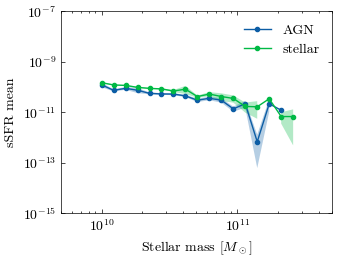

In [34]:
plt.plot(agn_bins[0:n_bin-1], AGN_mean, '.-', label = 'AGN')
plt.fill_between(agn_bins[0:n_bin-1], AGN_mean - AGN_std, AGN_mean + AGN_std, alpha = 0.3)
plt.plot(stellar_bins[0:n_bin-1], stellar_mean, '.-', label = 'stellar')
plt.fill_between(stellar_bins[0:n_bin-1], stellar_mean - stellar_std, stellar_mean + stellar_std, alpha = 0.3)
plt.xlabel('Stellar mass [$M_\odot$]')
plt.ylabel('sSFR mean')
plt.xlim([5E+9, 5E+11])
plt.ylim([1E-15, 1E-7])
plt.loglog()
plt.legend()
plt.savefig('Plots/sssfr_mean.svg', format='svg', dpi = 1200)
plt.show()

In [35]:
delta_ssfr = stellar_mean / AGN_mean
delta_ssfr

array([ 1.21778275,  1.63066717,  1.3032713 ,  1.29923404,  1.57511944,
        1.58502699,  1.32243609,  1.84291322,  1.39331249,  1.47088978,
        1.39789483,  2.58515827,  0.77980839, 24.19425999,  1.57711238,
        0.56382705,         nan])

In [36]:
import astropy.units as u
from astropy.cosmology import Planck13, z_at_value

# set global parameters
dt=0.01
eps=0.005
eta=0.1
R=0.1
f_b=0.15
M_h_min=1.e9
M_h_max=10.0**13
M_h_form=5.e8 # dm halo mass at t_form

# set global arrays
t=np.arange(dt,13.0,dt) # Gyr
z=t*0.
t_dyn=t*0.
for i in range(len(t)):
    z[i]=z_at_value(Planck13.age, t[i] * u.Gyr)
    t_dyn[i]=2.e7*(1+z[i])**(-0.75) # yr
#alto redshift -> galassie piccole e dense -> tempo dinamico più breve
def evolve_galaxy(t_form, t_obs, M_h_in, prin = False):
    # initialize arrays
    M_h=t*0.
    M_g=t*0.
    M_g_normal = t*0.
    M_s_normal = t*0.
    SFR_normal = t*0.
    M_s=t*0.
    SFR=t*0.
    
    i=0
    #csi = 0.
    #M_dot_h = 0
    
    while i<len(t):
        if t[i]<t_form :
            M_h[i]=M_h_in
        elif t[i]<t_obs:
            M_dot_h=42.0*((M_h[i-1]/1.e12)**1.127)*(1+1.17*z[i])*(0.3*(1+z[i])**3+0.7)**0.5 # M_sun/yr
            M_h[i]=M_h[i-1]+M_dot_h*dt*1.e9
            if M_h[i]<M_h_min:
                csi=0.0
            elif M_h[i]>M_h_min and M_h[i]<M_h_max:
                csi=1.0
            else:
                csi=0.0

            if (M_s[i-1] > 6E+10 and t[i] > 12.7):
                #print('bigger mass', 24 * dt * 1E+9)
                M_bh = M_s[i-1] * 0.0014
                M_g[i] = M_g[i-1] + dt * 1.e9 * (f_b * csi * M_dot_h - eps * (1 + eta - R) * M_g[i-1] / t_dyn[i]) - (24E-8 * M_bh * dt * 1E+9)
                M_g_normal[i] = M_g_normal[i-1] + dt * 1.e9 * (f_b * csi * M_dot_h - eps * (1 + eta - R) * M_g_normal[i-1] / t_dyn[i])
                SFR_normal[i] = eps * M_g_normal[i] / t_dyn[i]
                SFR[i] = eps * M_g[i] / t_dyn[i]
                M_s_normal[i] = M_s_normal[i-1] + SFR_normal[i] * dt * 1.e9
                M_s[i] = M_s[i-1] + SFR[i] * dt * 1.e9
            else:
                M_g[i] = M_g[i-1] + dt * 1.e9 * (f_b * csi * M_dot_h - eps * (1 + eta - R) * M_g[i-1] / t_dyn[i])
                SFR[i] = eps * M_g[i] / t_dyn[i]
                M_s[i] = M_s[i-1] + SFR[i] * dt * 1.e9
                M_g_normal[i] = M_g[i]
                M_s_normal[i] = M_s[i]
                SFR_normal[i] = SFR[i]
                
        else:
            M_h[i] = M_h[i-1]
            M_g[i] = M_g[i-1]
            M_s[i] = M_s[i-1]
            SFR[i] = SFR[i-1]
        i += 1

    delta_ssfr = (SFR_normal[i-1] / M_s_normal[i-1]) / (SFR[i-1]/M_s[i-1])
    if prin: return M_h, M_g, M_s, SFR, delta_ssfr
    else: return M_h, M_g, M_s, SFR    

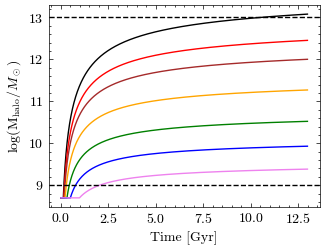

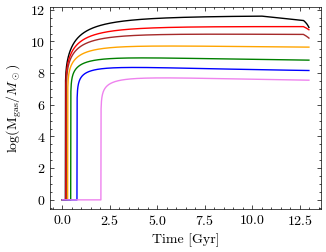

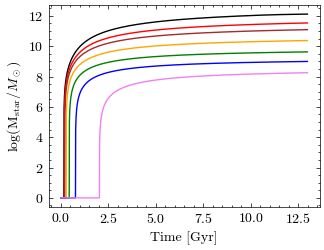

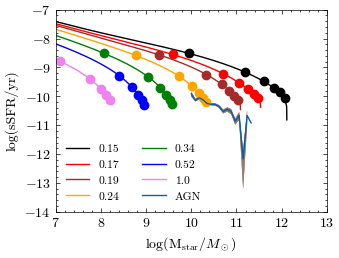

[0.15, 0.17, 0.19, 0.24, 0.34, 0.52, 1.0] 
 [2.5841231446101367, 1.5725307297354982, 1.6974000603226786, 1.0, 1.0, 1.0, 1.0]


In [49]:
def plot_sSFR(M_s, SFR, col, t_form):
    t_mark=np.arange(1., 13., 2.0)
    M_s_=np.where(M_s>0, M_s, 1.0)
    SFR_=np.where(SFR>0, SFR, 1.e-10)
    sSFR=SFR_/M_s_
    #plt.plot(np.log10(stellar_bins[0:24]), np.log10(stellar_mean), 'o-', label = 'stellar', color = 'cornflowerblue')
    #plt.fill_between(np.log10(stellar_bins[0:24]), np.log10(stellar_mean - stellar_std), np.log10(stellar_mean + stellar_std), color = 'cornflowerblue', alpha = 0.1)
    plt.fill_between(np.log10(agn_bins[0:17]), np.log10(AGN_mean - AGN_std), np.log10(AGN_mean + AGN_std), alpha = 0.3)    
    plt.plot(np.log10(M_s_), np.log10(sSFR), color=col, label = str(t_form))
    for tt in t_mark:
        plt.plot(np.log10(M_s_[t==tt]), np.log10(sSFR[t==tt]), color=col, marker="o")

t_form_plot=[0.15, 0.17, 0.19, 0.24, 0.34, 0.52, 1.00]
col_plot=["black", "red", "brown", "orange", "green", "blue", "violet"]

# plot M_h time evolution
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR = evolve_galaxy(t_form=t_form_plot[i], t_obs=13, M_h_in=M_h_form, prin = False)
    plt.plot(t, np.log10(np.where(M_h>0, M_h, 1.0)), color=col_plot[i])
plt.axhline(y=np.log10(M_h_min), color='black', linestyle='--')
plt.axhline(y=np.log10(M_h_max), color='black', linestyle='--')
#plt.ylim(8.7, 13.5)
plt.xlabel("Time [Gyr]")
plt.ylabel("log(M$_\mathrm{halo}$/$M_\odot$)")
plt.savefig('Plots/model_M_halo.svg', format='svg', dpi = 1200)
plt.show()

# plot M_g time evolution
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR = evolve_galaxy(t_form=t_form_plot[i], t_obs=13, M_h_in=M_h_form, prin = False)
    plt.plot(t, np.log10(np.where(M_g>0, M_g, 1.0)), color=col_plot[i])
#plt.ylim(5, 11)
plt.xlabel("Time [Gyr]")
plt.ylabel("log(M$_\mathrm{gas}$/$M_\odot$)")
plt.savefig('Plots/model_M_gas.svg', format='svg', dpi = 1200)
plt.show()

# plot M_s time evolution
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR = evolve_galaxy(t_form=t_form_plot[i], t_obs=13, M_h_in=M_h_form, prin = False)
    plt.plot(t, np.log10(np.where(M_s>0, M_s, 1.0)), color=col_plot[i])
#plt.ylim(5, 11)
plt.xlabel("Time [Gyr]")
plt.ylabel("log(M$_\mathrm{star}$/$M_\odot$)")
plt.savefig('Plots/model_M_star.svg', format='svg', dpi = 1200)
plt.show()


# plot sSFR
d_sSFR = []
M_s_arr = []
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR, delta_sSFR = evolve_galaxy(t_form=t_form_plot[i], t_obs=13, M_h_in=M_h_form, prin = True)
    M_s_arr.append(M_s[1298])
    plot_sSFR(M_s, SFR, col_plot[i], t_form_plot[i])
    d_sSFR.append(delta_sSFR)
plt.plot(np.log10(agn_bins[0:17]), np.log10(AGN_mean), '-', label = 'AGN')    
plt.xlim(7, 13)
plt.ylim(-14, -7)
plt.xlabel("log(M$_\mathrm{star}$/$M_\odot$)")
plt.ylabel("log(sSFR/yr)")
plt.legend(fontsize = 'small', ncols = 2)
plt.savefig('Plots/model_ssfr.svg', format='svg', dpi = 1200)
plt.show()
print(t_form_plot, '\n', d_sSFR)

In [ ]:
plt.plot(agn_bins[0:24], delta_ssfr, 'o-')
plt.plot(M_s_arr, d_sSFR, 'o-')
plt.semilogx()

In [ ]:
t_mark=np.arange(1., 13., 2.0) * u.Gyr
print(t_mark)
print(t)

evolviamo le galassie tra 10 Myr  e 13 Gyr.

Abbiamo provato a cambiar i paramerri del modello ma non fa niente. Il fossati ha confermato che non dovrebbe succedre niente. Il cantalupo dice di mettere eps a 0.005 invece di 0.02 ed eta a 0.1 invece che a 1.

Le linee del modello sono meno steep (sopra 10 alla -9) rispetto alle nostre: possiamo cambiare parametri/assunzioni/componenti del modello per adattarlo meglio ai nostri dati. Pensiamoci che magari lo chiede :)

Credo che sfr alla fine sia qualcosa di esponenziale quindi cercalo e cambia l'esponente.

Cosa succedrebbe se eta cambiasse in funzione della massa?

eta è la frazione tra rate di massa in uscita dovuta alle SN2 e sfr. Se integriamo per il tempo troviamo la frazione tra massa del gas persa e stellar mass. Abbiamo allora provato a mettere:
- eta = cost / stellar mass -> all'inizio stellar_mass = 0 dà problemi
- eta = cost / (1 - mg) -> 1 non ha senso, bisognerebbe avere la massa totale che comunque all'inizio ha poco senso
- eta = const / (m_h_max - mg) -> m_h_max domina sempre, eta rimane sull'ordine di cost/m_max
E poi come valutiamo questa costante? Dovrebbe essere tra 0.1 e 1, quindi dovrebbe anch'essa dipendere dalla massa in maniera da non sforare.

Abbiamo pensato anche di farla andare con il tempo, ma è anche vero che abbiamo cambiato la costante di diversi ordini di grandezza (da 0.1 a 10^5) e non è successo niente. 

Idealmente però, aumentare eta significherebbe aumentare la frazione di gas perso a cause delle SN, quindi aiuta a diminuire la gas mass e di conseguenza anche la sSFR. L'unica spiegazione che mi viene in mente è che sia un fenomeno molto poco rilevante rispetto al resto.

Abbiamo tolto tutto il termine dovo m_dot_h nell'evoluzione di m_g e trovato che le linee si trovano più in accordo.
Questo termine dovrebbe stabilire il gas preso e perso dall'evoluzione stellare. abbiamo guardato quanto fa il rapporto tra m_gas e tdyn va da circa 0 fino a 10^5, mentre esp * () = 0.005 * 0.8 = 0.004. -> è ovvio che cambiare eta non cambiava niente, epsilon lo controbilanciava! 
Se volessimo evitare di togliere completamente il termine dovremmo rendere epsilon circa 10^-5 per bilanciare il rapporto tra m gas e tdyn. Fare così sposta tutte le linee più a sinistra mentre ssfr rimane costante. In realtà mettere epsilon = 10^-5 non è come eliminarlo dalla funzione di m_g perché anche sfr dipende da epsilon quindi cambiamo più roba di quanto volessimo. Anche volendo è un valore fin troppo basso e vorrebbe dire che non abbiamo gas che diventa stelle (epsilon è defiito come frazione di gas che diventa stelle a ogni tempo dinamico).

In [ ]:
0.8 * 0.005

abbiamo trovato la massa dei buchi neri nelle agn. da un paper del cantalupo sembrerebbe che l'outflow di massa di un agn sia costante, per un buco nero di 10^8 msol l'outflow è di 24 msol all'anno

In [ ]:
m_rate = 24 / 1E+8
m_rate * 1E+7

In [ ]:
a = 0
for i in range (len(t)):
    if (t[i] > 12.5): a = a + 1
print(len(t), a)

In [44]:
?plt.legend

Signature: plt.legend(*args, **kwargs) -> 'Legend'
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

.. note::
    Specific artists can be excluded from the automatic legend element
    selection by using a label starting with an underscore, "_".
    A string starting with an underscore is the default label for a